# Session 7 - iGraph

This notebook is for using the python bindings for iGraph, if you prefer R (ugh!) or even C/C++ (OMG!) refer to the corresponding documentation.

Before running this notebook you have to install the library *python-igraph* (not igraph) with:

*pip install python-igraph --user*

it takes some minutes (heavy compilation involved :-)

If you want to install python-igraph on windows or mac you should follow the documentation instructions http://igraph.org/python/#startpy

To generate scalable vector graphs (SVG) with the plot methods you need *pycairo* (it is not instalable using pip, you have to download it from http://cairographics.org/pycairo/) and the library *cairo* has to be installed in your linux). We will avoid using pycairo generating png files instead.

In this notebook it is also used numpy and matplotlib, they also can be installed using pip

Apart from this notebook, the tutorial for iGraph is a good starting point http://igraph.org/python/doc/tutorial/tutorial.html

In [1]:
from igraph import Graph

Creating a graph is simple, this is an empyt graph (print returns a representation of the graph)

In [2]:
g = Graph()
print(g)

IGRAPH U--- 0 0 --


We can add vertices like for example, vertices from [0..3]

In [3]:
g.add_vertices(4)
print(g)

IGRAPH U--- 4 0 --


and some edges among them (as a list of pairs)

In [4]:
g.add_edges([(1,2), (1,3), (2,3), (3, 0)])
print(g)

IGRAPH U--- 4 4 --
+ edges:
1--2 1--3 2--3 0--3


Class Graph provides a couple of iterators to traverse the vertices (**vs**) and the edges (**es**)

In [5]:
for v in g.vs:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x1053cb408>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x1053cb408>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x1053cb408>, 2, {})
igraph.Vertex(<igraph.Graph object at 0x1053cb408>, 3, {})


In [6]:
for e in g.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x1053cb408>, 0, {})
igraph.Edge(<igraph.Graph object at 0x1053cb408>, 1, {})
igraph.Edge(<igraph.Graph object at 0x1053cb408>, 2, {})
igraph.Edge(<igraph.Graph object at 0x1053cb408>, 3, {})


Properties can be attached to the vertices (and the edges)

In [7]:
for i, v in enumerate(g.vs):
    v['name'] = str(i)
for v in g.vs:
    print(v.attributes())

{'name': '0'}
{'name': '1'}
{'name': '2'}
{'name': '3'}


In [8]:
import random
for edge in g.es:
    edge['weight'] = random.randint(1,10)
for edge in g.es:
    print(edge['weight'])

7
2
5
6


Class Graph has methods to compute properties of a graph and many useful algorithms (http://igraph.org/python/doc/igraph.Graph-class.html)

In [9]:
g.degree()

[1, 2, 2, 3]

In [10]:
g.edge_betweenness()

[1.0, 2.0, 2.0, 3.0]

Plotting the graph is a little bit more complicated because by default it uses the Cairo library (that it is not installed in the lab PCs), we can circunvent this problem by generatin a png file and loading it in the notebook. There are different styles and layouts for plotting a graph, you can look for the parameters in the documentation of the plot function in the Graph class.

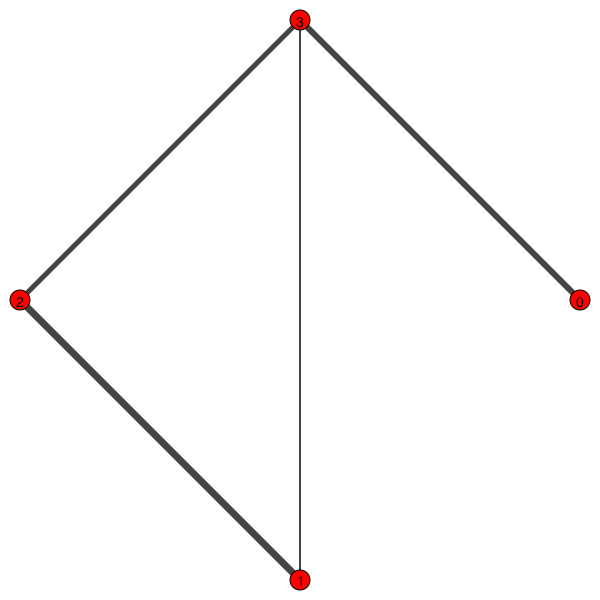

In [11]:
from IPython import display
from igraph import plot

g.vs['label'] = g.vs['name']
g.es['width'] = g.es['weight']
plot(g, layout = g.layout_circle(),target="./igraph_demo.png")
display.Image(filename="./igraph_demo.png")

## Graph Generators

iGraph implements several graph generators (Erdos-Renyi, Barabasi, Watts-Strogratz, ...), different layouts have been used for plotting the graphs (you can look up in the documentation the different alternatives and parameters)

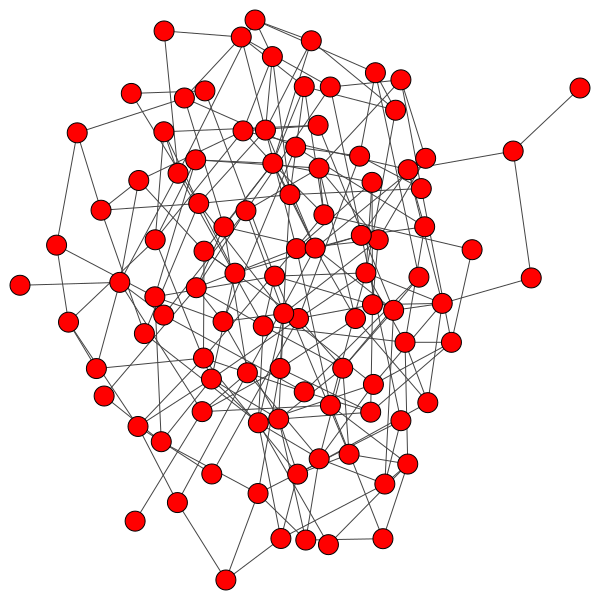

In [12]:
erdos = Graph.Erdos_Renyi(100,0.05)
r = plot(erdos, layout = erdos.layout_kamada_kawai(),target="./erdos.png")
display.Image(filename="./erdos.png")

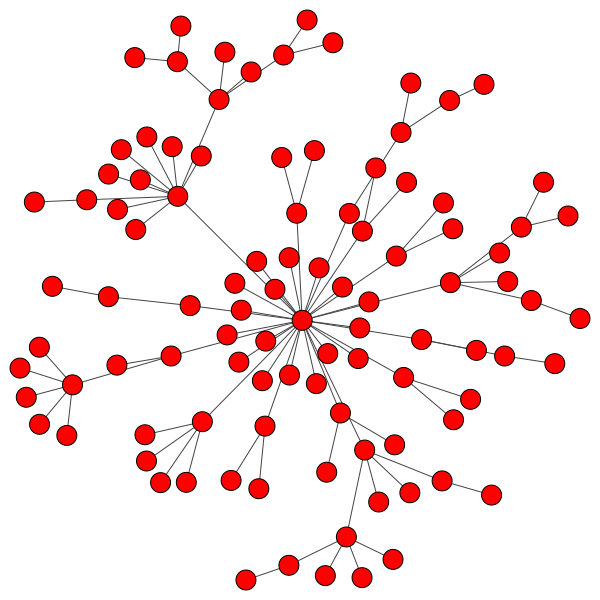

In [13]:
barabasi = Graph.Barabasi(100,1)
r = plot(barabasi, layout = barabasi.layout_fruchterman_reingold(),target="./barabasi.png")
display.Image(filename="./barabasi.png")

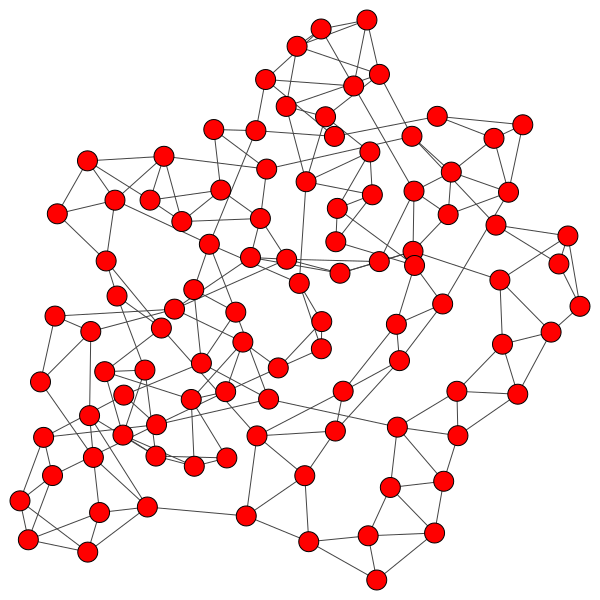

In [14]:
watts = Graph.Watts_Strogatz(1,100,2,0.05)
r = plot(watts, layout = watts.layout_lgl(),target="./watts.png")
display.Image(filename="./watts.png")

## Measuring graphs

The following cells replicates more or less what you have in the session documentation for the lattice graph

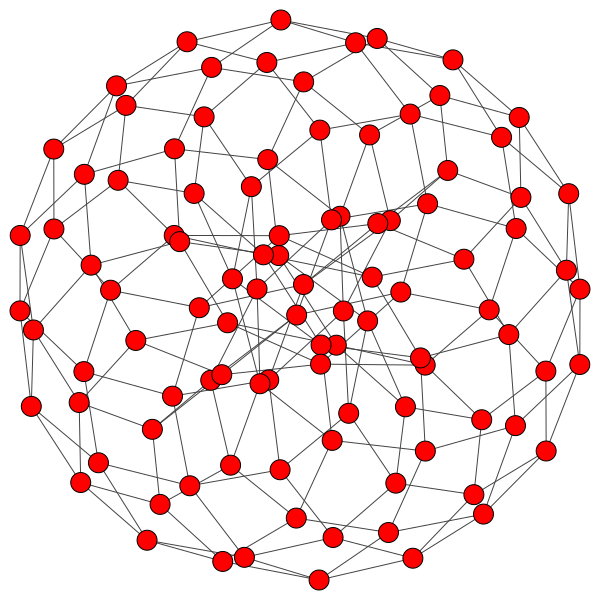

In [15]:
lattice = Graph.Lattice([10,10])
r = plot(lattice, layout=lattice.layout_kamada_kawai(),target="./lattice.png")
display.Image(filename="./lattice.png")

In [16]:
lattice.average_path_length()

5.05050505050505

In [17]:
lattice.diameter()

10

In [18]:
lattice.rewire_edges(0.2)

In [19]:
lattice.average_path_length()

3.5125252525252524

In [20]:
lattice.diameter()

7

The following is for the watts, erdos and ring graphs and the different measures over graphs

In [21]:
watts.transitivity_undirected()

0.3737864077669903

In [22]:
p_hat = len(watts.es)/(len(watts.vs)*len(watts.vs)/2)
p_hat

0.04

In [23]:
erdos.transitivity_undirected()

0.03423236514522822

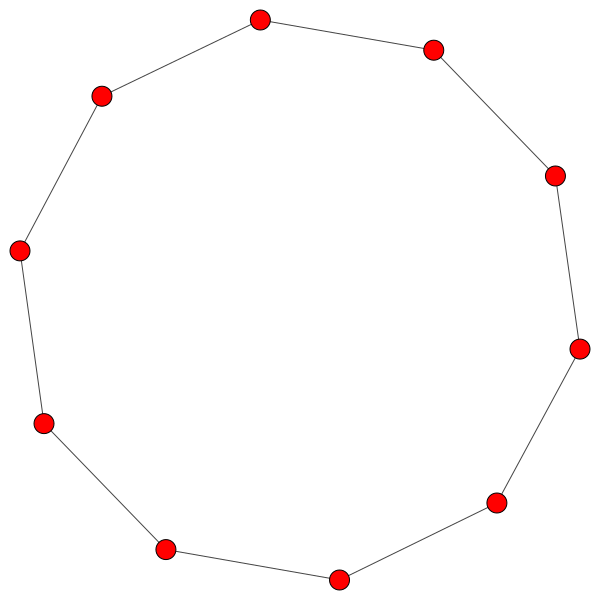

In [24]:
ring = Graph.Ring(10)
r = plot(ring, layout=ring.layout_kamada_kawai(),target="./ring.png")
display.Image(filename="./ring.png")

In [25]:
ring.degree()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [26]:
barabasi = Graph.Barabasi(1000,3)
p_hat = len(barabasi.es)/((len(barabasi.vs)-1)*len(barabasi.vs)/2.0)
p_hat
erdos = Graph.Erdos_Renyi(1000,p_hat)
p_hat

0.005993993993993994

In [27]:
from numpy import histogram, max
h, b = histogram(erdos.degree(), bins=max(erdos.degree()), density=True)
print(h)
print(b)

[ 0.002  0.017  0.052  0.088  0.13   0.152  0.165  0.126  0.111  0.075
  0.044  0.023  0.008  0.007]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.]


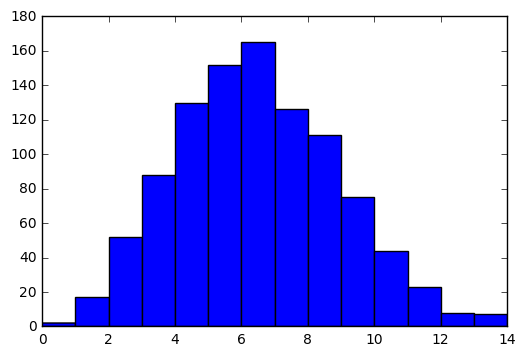

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
r = plt.hist(erdos.degree(), bins=max(erdos.degree()))

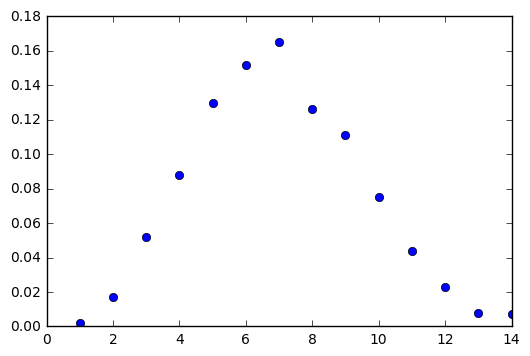

In [29]:
r = plt.plot(b[1:], h, 'o' )

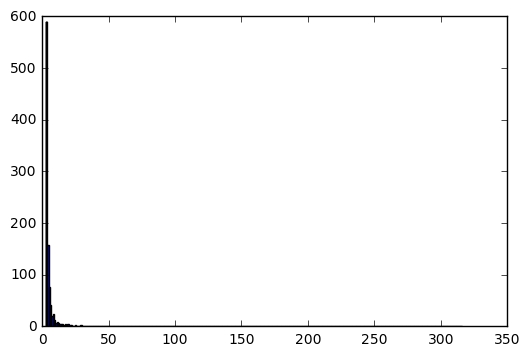

In [30]:
r = plt.hist(barabasi.degree(), bins=max(barabasi.degree()))

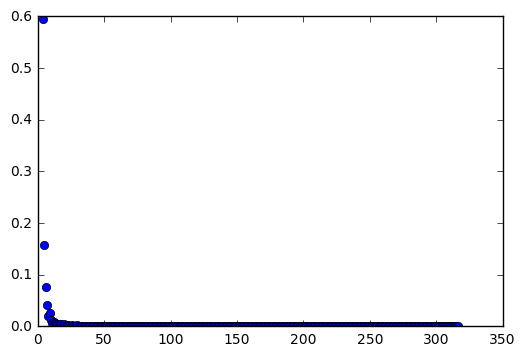

In [31]:
h, b = histogram(barabasi.degree(), bins=max(barabasi.degree()), density=True)
r = plt.plot(b[1:], h, 'o' )

## Communities

This follows the part about social graphs measures and comunity detection.

First we creeate a graph following the Erdos-Reny model

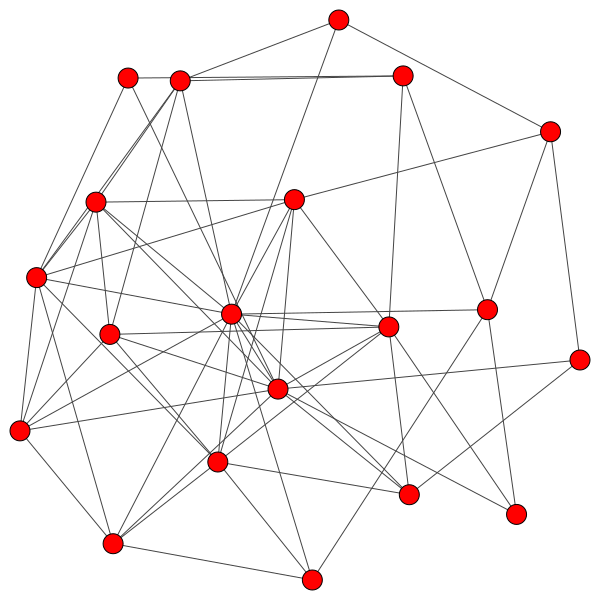

In [32]:
from igraph import plot
erdos = Graph.Erdos_Renyi(20,0.3)
r = plot(erdos, layout = erdos.layout_kamada_kawai(),target="./erdos.png")
display.Image(filename="./erdos.png")

We can measure vertices **betweenness**

In [33]:
erdos.betweenness()

[28.614754689754687,
 8.66031746031746,
 3.15,
 3.0365440115440117,
 3.238888888888889,
 1.4686868686868686,
 11.331060606060605,
 2.661111111111111,
 8.606746031746031,
 4.265151515151515,
 2.1845238095238093,
 2.05,
 7.220707070707071,
 5.011111111111111,
 1.0151515151515151,
 8.931746031746032,
 1.9678571428571427,
 33.92958152958153,
 1.327020202020202,
 7.329040404040402]

Vertices **degree**

In [34]:
erdos.degree()

[11, 7, 6, 7, 5, 6, 8, 6, 8, 4, 3, 3, 6, 4, 3, 5, 3, 13, 4, 8]

Vertices **closeness**

In [35]:
erdos.closeness()

[0.7037037037037037,
 0.6129032258064516,
 0.5588235294117647,
 0.6129032258064516,
 0.5757575757575758,
 0.5588235294117647,
 0.6333333333333333,
 0.5588235294117647,
 0.59375,
 0.5135135135135135,
 0.48717948717948717,
 0.5,
 0.5588235294117647,
 0.5,
 0.5,
 0.5588235294117647,
 0.5135135135135135,
 0.76,
 0.5277777777777778,
 0.6333333333333333]

nodes **pagerank**

In [36]:
erdos.pagerank()

[0.08683623069044025,
 0.05588525843086923,
 0.04834455983748911,
 0.05500010962607074,
 0.042663629354033596,
 0.04781252006884912,
 0.0644317691874159,
 0.048389917654613715,
 0.06312687009257857,
 0.03749981981293433,
 0.029719121512898086,
 0.028886014029119028,
 0.05055462489649331,
 0.03885285718201583,
 0.028863616349214735,
 0.04592746177363398,
 0.02943071937647038,
 0.09960419577775036,
 0.035350170580270235,
 0.06282053376683956]

iGraph also has several community detection algorithms, you can look them up in the Graph class documentation to see how they work and how to use them.

The algorithm return different objects (clusters or dendrograms) that have different methods for obtaining what you need.

The method **community_edge_betweenness()** returns a dendrogram object that allows to extract the clusters. You can also plot dendrograms and clusters.

Clusters: 7


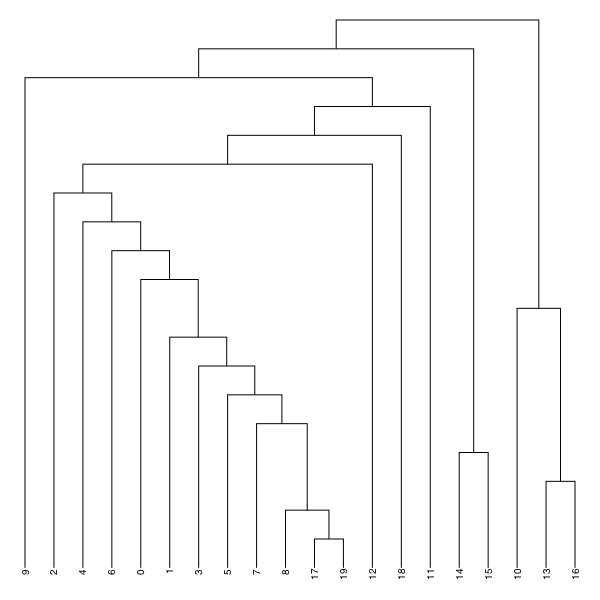

In [37]:
com = erdos.community_edge_betweenness()
r = plot(com,target="./erdos-dendro.png", orientation='bottom-top')
print ('Clusters:', com.optimal_count) # Optimal number of clusters from the dendrogram
display.Image(filename="./erdos-dendro.png")

the *as_clustering* method of the dendrogram object returns a graph with the clusters

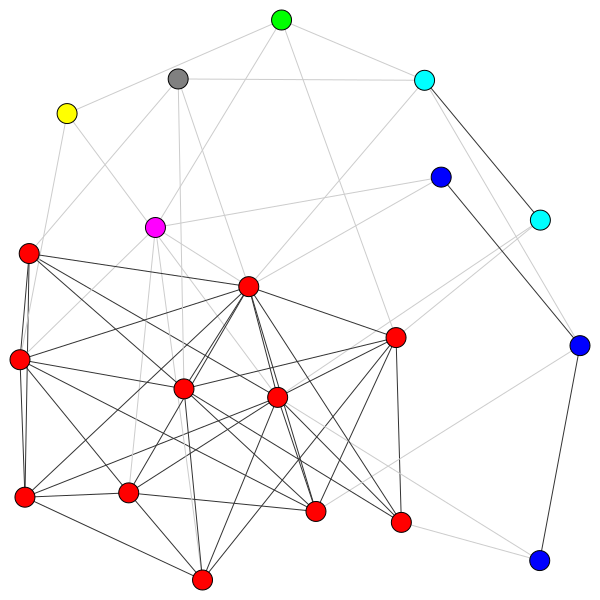

In [38]:
r = plot(com.as_clustering(), layout = erdos.layout_kamada_kawai(),target="./com-erdos.png")
display.Image(filename="./com-erdos.png")

You can also obtain the clusters and the vertices in the clusters

In [39]:
for d in com.as_clustering():
    print(d)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 17, 19]
[9]
[10, 13, 16]
[11]
[12]
[14, 15]
[18]


## Social experiment

You have with the session documentation the file 'caimlab.txt'. This is the graph of the laboratory 'partnerships' of the previous five lab sessions.

The graph has been anonymized.

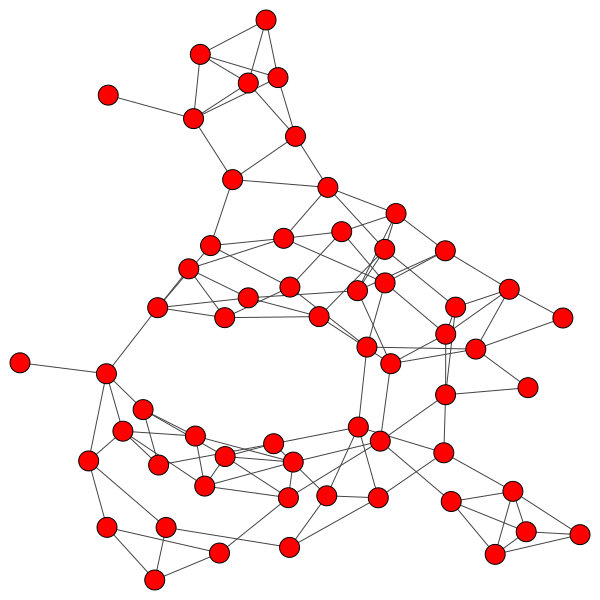

In [40]:
g = Graph(directed=False)
g = g.Load('./caimlab.txt', format='edgelist', directed=False)
r = plot(g, layout = g.layout_kamada_kawai(),target="./caimlab-graph.png")
display.Image(filename="./caimlab-graph.png")

We can compute the communities in this social graph using the edge betweenness

Clusters: 7


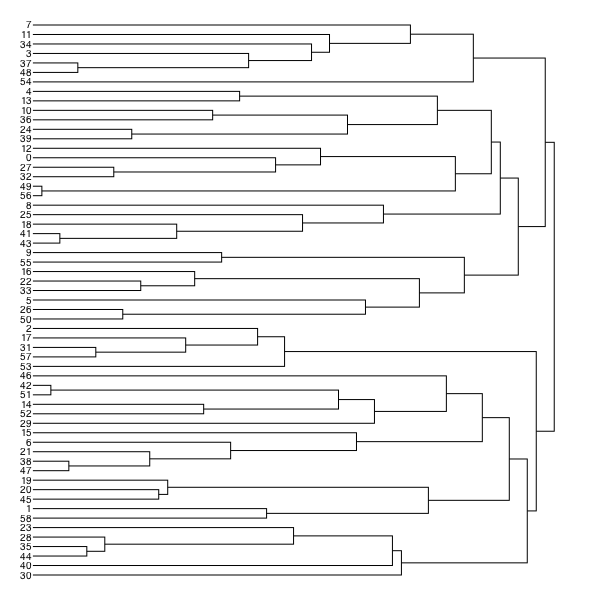

In [41]:
dend = g.community_edge_betweenness()

r = plot(dend,target="./caimlab-dend.png")
print ('Clusters:', dend.optimal_count)
display.Image(filename="./caimlab-dend.png")

We can see that there is a clear division in two clusters, probably because there are two lab groups, but there is a fines structure.

[0, 4, 8, 10, 12, 13, 18, 24, 25, 27, 32, 36, 39, 41, 43, 49, 56]
[1, 19, 20, 45, 58]
[2, 17, 31, 53, 57]
[3, 7, 11, 34, 37, 48, 54]
[5, 9, 16, 22, 26, 33, 50, 55]
[6, 14, 15, 21, 29, 38, 42, 46, 47, 51, 52]
[23, 28, 30, 35, 40, 44]


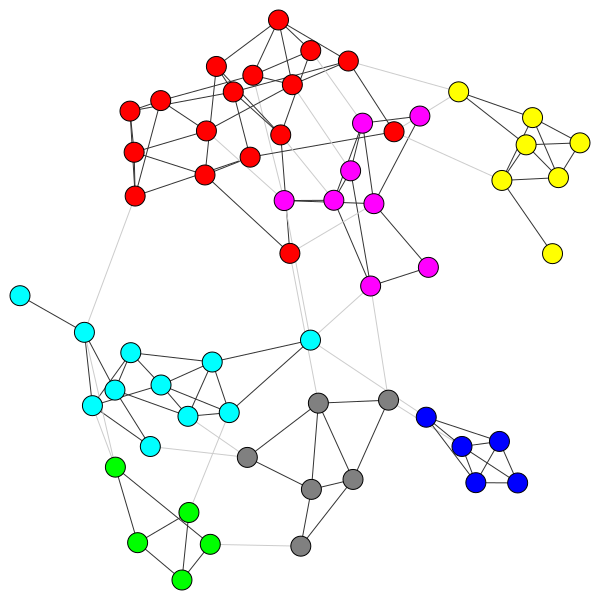

In [42]:
plot(dend.as_clustering(), layout = g.layout_fruchterman_reingold(), target="./caimlab-clust.png")

for d in dend.as_clustering():
    print(d)
    
display.Image(filename="./caimlab-clust.png")